In [1]:
!pip install numpy pandas matplotlib yfinance tensorflow scikit-learn

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [3]:
# Data Processing
def load_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

def prepare_data(data, feature='Close', window_size=60):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data[feature].values.reshape(-1, 1))

    x_train, y_train = [], []
    for i in range(window_size, len(scaled_data)):
        x_train.append(scaled_data[i - window_size:i, 0])
        y_train.append(scaled_data[i, 0])

    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    
    return x_train, y_train, scaler

In [4]:
# Model Operations
def build_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def train_model(model, x_train, y_train, epochs=50, batch_size=32):
    model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)
    return model

In [5]:
# Load data
ticker = 'CBA.AX'
start_date = '2020-01-01'
end_date = '2024-01-01'
data = load_data(ticker, start_date, end_date)

# Prepare data
window_size = 60
x_train, y_train, scaler = prepare_data(data, window_size=window_size)

# Build model
input_shape = (x_train.shape[1], 1)
model = build_model(input_shape)

# Train model
model = train_model(model, x_train, y_train)

[*********************100%%**********************]  1 of 1 completed

Epoch 1/50



/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1092
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0097
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0086
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0066
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0071
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0065
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0069
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0062
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0059
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0055
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0059
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0056
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0056
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0053
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0047
Epoch 16/50
30/

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Predicted price for the next day: 110.16
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/

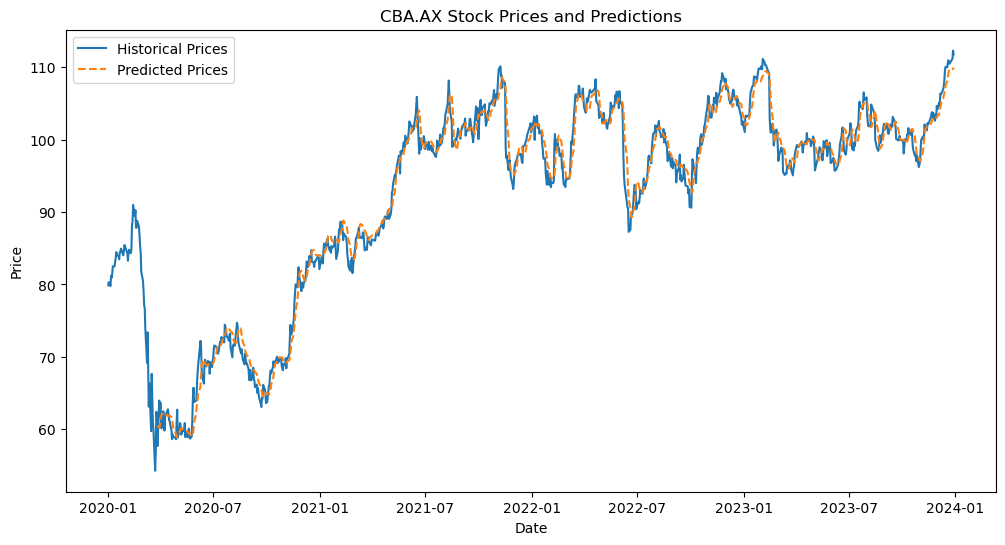

In [15]:
# Predictor

def predict_next_day(model, data, scaler, window_size=60):
    last_window = data[-window_size:]
    last_window_scaled = scaler.transform(last_window.values.reshape(-1, 1))
    last_window_scaled = np.reshape(last_window_scaled, (1, window_size, 1))
    predicted_price_scaled = model.predict(last_window_scaled)
    predicted_price = scaler.inverse_transform(predicted_price_scaled)
    return predicted_price[0, 0]

# Make prediction
predicted_price = predict_next_day(model, data['Close'], scaler)
print(f'Predicted price for the next day: {predicted_price:.2f}')

# Visualization
def plot_training_data(data, feature='Close', model=None, scaler=None, window_size=60):
    plt.figure(figsize=(12, 6))
    plt.plot(data[feature], label='Historical Prices')
    
    if model is not None and scaler is not None:
        predicted_prices = []
        for i in range(window_size, len(data)):
            last_window = data[feature].iloc[i - window_size:i]
            predicted_price = predict_next_day(model, last_window, scaler)
            predicted_prices.append(predicted_price)
        plt.plot(data.index[window_size:], predicted_prices, label='Predicted Prices', linestyle='--')
    
    plt.title(f'{ticker} Stock Prices and Predictions')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

plot_training_data(data, model=model, scaler=scaler, window_size=window_size)